# Lab 3: Solve the Maze using A*

Start location is valid = 0
Target location is valid = 0


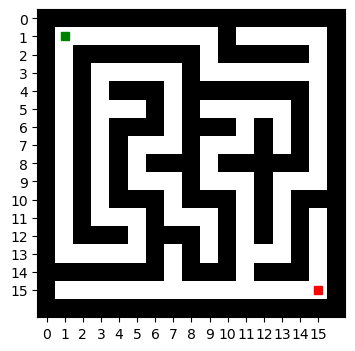

In [4]:
from pylab import *
import numpy

# Generate maze
def make_maze(w, h):
    vis = [[0] * w + [1] for _ in range(h)] + [[1] * (w + 1)]
    ver = [["10"] * w + ['1'] for _ in range(h)] + [[]]
    hor = [["11"] * w + ['1'] for _ in range(h + 1)]
 
    def walk(x, y):
        vis[y][x] = 1
 
        d = [(x - 1, y), (x, y + 1), (x + 1, y), (x, y - 1)]
        shuffle(d)
        for (xx, yy) in d:
            if vis[yy][xx]: continue
            if xx == x: hor[max(y, yy)][x] = "10"
            if yy == y: ver[y][max(x, xx)] = "00"
            walk(xx, yy)
 
    walk(numpy.random.randint(w), numpy.random.randint(h))
 
    s = ""
    for (a, b) in zip(hor, ver):
        s += ''.join(a + ['\n'] + b + ['\n'])
        
    M=[]
    for line in s.split("\n"):
        if line!="":
            R=[]
            for e in line:
                R.append(int(e))
            M.append(R)
    return M

# Generate maze and define start and target locations
maze_width=8
maze_height=8
startLocation=(1,1)
targetLocation=(maze_height*2-1,maze_width*2-1)
maze=numpy.array(make_maze(maze_width,maze_height))

# Plot the maze
def plot_maze(maze, start, end, maze_width, maze_height):
    plt.imshow(maze, cmap='binary')
    plt.xticks(range(0, maze_width*2))
    plt.yticks(range(0, maze_height*2))
    plt.plot(start[1], start[0], 'gs')
    plt.plot(end[1], end[0], 'rs')

# Check if the start and target locations are valid
if maze[startLocation[0]][startLocation[1]]==1:
    print('Start location is not valid =', maze[1][1])
else:
    print('Start location is valid =', maze[1][1])
if maze[targetLocation[0]][targetLocation[1]]==1:
    print('Target location is not valid =', maze[15][15])
else:
    print('Target location is valid =', maze[15][15])

# Plot maze
plt.figure(figsize=[maze_width/2,maze_height/2])
plot_maze(maze, startLocation, targetLocation, maze_width, maze_height)
plt.show()

In [5]:
# A* algorithm
def a_star(maze, start, end):
    # List of squares to visit
    queue = [start]
    # Dictionary with the cost from start to each square
    costs = {start: 0}
    # Keep track of the parents of each square
    parents = {start: None}
    # List or set to store visited squares
    visited = []

    # Repeat until we have visited all squares
    while queue:
        # Sort the queue by cost + heuristic
        queue.sort(key=lambda x: costs[x] + abs(end[0] - x[0]) + abs(end[1] - x[1]))

        # Get the square with the lowest cost + heuristic
        current = queue.pop(0)

        # Add the current square to the visited list or set
        visited.append(current)

        # Check if we have reached the end
        if current == end:
            # Save the path
            path = []
            while current:
                path.append(current)
                current = parents[current]
            return path[::-1], visited

        # Get the row and column of the current square
        row, col = current

        # List of neighbors
        neighbors = []

        # Check if the above square is a valid neighbor
        if row > 0 and maze[row - 1][col] == 0:
            neighbors.append((row - 1, col))

        # Check if the below square is a valid neighbor
        if row < len(maze) - 1 and maze[row + 1][col] == 0:
            neighbors.append((row + 1, col))

        # Check if the left square is a valid neighbor
        if col > 0 and maze[row][col - 1] == 0:
            neighbors.append((row, col - 1))

        # Check if the right square is a valid neighbor
        if col < len(maze[0]) - 1 and maze[row][col + 1] == 0:
            neighbors.append((row, col + 1))

        # Get cost of reaching each neighbor
        for neighbor in neighbors:
            cost = costs[current] + 1

            # Update the cost and parent of the neighbor if the cost is lower than the current
            if neighbor not in costs or cost < costs[neighbor]:
                costs[neighbor] = cost
                parents[neighbor] = current
                queue.append(neighbor)

    # Return none if no path to the end is found
    return None

In [6]:
# Find the best path with A*
generated_path, visited = a_star(maze, startLocation, targetLocation)

# Plot the visited squares and the best path
plt.figure(figsize=[maze_width,maze_height])

plt.subplot(1, 2, 1)
plot_maze(maze, startLocation, targetLocation, maze_width, maze_height)
plot(transpose(visited[1:-1])[1],transpose(visited[1:-1])[0],'k.')

plt.subplot(1, 2, 2)
plot_maze(maze, startLocation, targetLocation, maze_width, maze_height)
plot(transpose(generated_path[1:-1])[1],transpose(generated_path[1:-1])[0],'k.')

# Show the figure
plt.show()

ValueError: not enough values to unpack (expected 3, got 2)

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Use imshow() to display the spectral map
plt.imshow(cost_map, cmap=cm.viridis)

# Show the plot
plt.show()
